In [1707]:
!pip install pdf2image
!pip install easyocr

In [1708]:
from pdf2image import convert_from_path
pages = convert_from_path('class.pdf')
i = 0
for page in pages:
    page.save('img/class'+'('+str(i)+')'+'.jpg', 'JPEG')
    i+=1

In [1709]:
import easyocr
reader = easyocr.Reader(['ch_tra', 'en']) # need to run only once to load model into memory

In [1710]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [1711]:
img = cv2.imread(files[0], -1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binary = cv2.bitwise_not(gray)
(contours,tmp) = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [1712]:
#找中間表格
max_area = -1
max_cood = []
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)
    #find area max rect
    if max_area < w*h:
        max_area = w*h
        max_cood = (x,y,x+w,y+h)

In [1713]:
img_roi = img[max_cood[1]:max_cood[3], max_cood[0]:max_cood[2]]

In [1714]:

result = img_roi.copy()
gray = cv2.cvtColor(img_roi,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

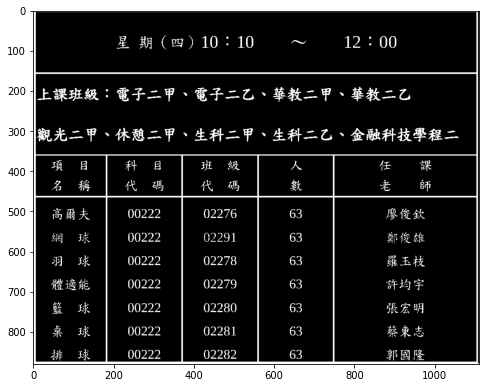

In [1715]:
plt.figure(figsize=(8,8))
plt.imshow(thresh, cmap='gray')

In [1716]:
# Detect horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#for c in cnts:
#    cv2.drawContours(result, [c], -1, (36,255,12), 2)

In [1717]:
heights = []
for c in cnts:
    heights.append(c[0][0][1])

In [1718]:
heights = sorted(heights)
heights

[0, 155, 359, 462, 874]

In [1719]:
cv2.imwrite('img/roi-1.jpg',thresh)

True

In [1720]:
result = reader.readtext('img/roi-1.jpg',width_ths=0.9)

In [1721]:
result[0]

([[204, 56], [556, 56], [556, 104], [204, 104]],
 '星 期(四) 10 : 10',
 0.16445443034172058)

In [1722]:
for i in range(len(heights)):
    bucket = []
    for re in result:
        print(re)

([[204, 56], [556, 56], [556, 104], [204, 104]], '星 期(四) 10 : 10', 0.16445443034172058)
([[853, 57], [911, 57], [911, 99], [853, 99]], '00', 0.5704437494277954)
([[767, 59], [821, 59], [821, 101], [767, 101]], '12', 0.9549238085746765)
([[202, 184], [944, 184], [944, 236], [202, 236]], '電子二甲 電子二乙`華教二甲`華教二乙', 0.05900763347744942)
([[10, 186], [172, 186], [172, 234], [10, 234]], '上課班級', 0.9854573011398315)
([[4, 283], [1064, 283], [1064, 337], [4, 337]], '觀光二甲`休憩二甲`生科二甲`生科二乙`金融科技學程二', 0.11170704662799835)
([[855, 363], [999, 363], [999, 407], [855, 407]], '任課', 0.9769890308380127)
([[41, 365], [169, 365], [169, 405], [41, 405]], '項目', 0.6137872934341431)
([[221, 365], [337, 365], [337, 407], [221, 407]], '科目', 0.8664586544036865)
([[413, 368], [521, 368], [521, 404], [413, 404]], '班 級', 0.49679291248321533)
([[41, 415], [163, 415], [163, 457], [41, 457]], '名稱', 0.6998891234397888)
([[855, 417], [995, 417], [995, 457], [855, 457]], '老師', 0.8835815191268921)
([[223, 419], [333, 419], [333,

In [1723]:
data = []
for i in range(len(heights)):
    bucket = []
    for re in result:
        if re[0][0][1] > heights[i] and re[0][0][1] <= heights[i+1]:
            bucket.append(re)
            print(i,"=",re)
    data.append(bucket)

0 = ([[204, 56], [556, 56], [556, 104], [204, 104]], '星 期(四) 10 : 10', 0.16445443034172058)
0 = ([[853, 57], [911, 57], [911, 99], [853, 99]], '00', 0.5704437494277954)
0 = ([[767, 59], [821, 59], [821, 101], [767, 101]], '12', 0.9549238085746765)
1 = ([[202, 184], [944, 184], [944, 236], [202, 236]], '電子二甲 電子二乙`華教二甲`華教二乙', 0.05900763347744942)
1 = ([[10, 186], [172, 186], [172, 234], [10, 234]], '上課班級', 0.9854573011398315)
1 = ([[4, 283], [1064, 283], [1064, 337], [4, 337]], '觀光二甲`休憩二甲`生科二甲`生科二乙`金融科技學程二', 0.11170704662799835)
2 = ([[855, 363], [999, 363], [999, 407], [855, 407]], '任課', 0.9769890308380127)
2 = ([[41, 365], [169, 365], [169, 405], [41, 405]], '項目', 0.6137872934341431)
2 = ([[221, 365], [337, 365], [337, 407], [221, 407]], '科目', 0.8664586544036865)
2 = ([[413, 368], [521, 368], [521, 404], [413, 404]], '班 級', 0.49679291248321533)
2 = ([[41, 415], [163, 415], [163, 457], [41, 457]], '名稱', 0.6998891234397888)
2 = ([[855, 417], [995, 417], [995, 457], [855, 457]], '老師', 0.8

In [1724]:
i=0
tmp=[]
dd=[]
for d in sorted(data[3], key=lambda x:x[0][0][0]):
    tmp.append(d)
    if i==6:
        dd.append(sorted(tmp, key=lambda x:x[0][0][1]))
        tmp=[]
        i=0
    else:
        i+=1

In [1725]:
dd[0]

[([[34, 476], [158, 476], [158, 598], [34, 598]],
  '萄爾夫',
  0.0007458648178726435),
 ([[43, 547], [99, 547], [99, 587], [43, 587]], '網', 0.9976233839988708),
 ([[42, 602], [150, 602], [150, 652], [42, 652]], '羽球', 0.716058075428009),
 ([[40, 660], [146, 660], [146, 708], [40, 708]], '體適能', 0.9966269135475159),
 ([[44, 718], [150, 718], [150, 768], [44, 768]], '籃球', 0.7248485684394836),
 ([[45, 777], [147, 777], [147, 821], [45, 821]], '桌球', 0.5055788159370422),
 ([[41, 835], [147, 835], [147, 877], [41, 877]], '排球', 0.9493097066879272)]

In [1735]:
import pandas as pd

In [1746]:
clean_data = []
out=[]
for c in dd:
    tmp=[]
    for r in c:
        tmp.append(r[1])
    print('---')
    out.append(tmp)
    print(tmp)
out = pd.DataFrame(out).T
out.columns=['name','sub_id','class_id','num', 'teacher']
out

---
['萄爾夫', '網', '羽球', '體適能', '籃球', '桌球', '排球']
---
['00222', '00222', '00222', '00222', '00222', '00222', '00222']
---
['02276', '02291', '02278', '02279', '02280', '02281', '02282']
---
['63', '63', '63', '63', '63', '63', '63']
---
['廖俊欽', '鄭俊雄', '羅玉枝', '許均宇', '張宏明', '蔡東志', '郭國隆']


,name,sub_id,class_id,num,teacher
0,萄爾夫,00222,02276,63,廖俊欽
1,網,00222,02291,63,鄭俊雄
2,羽球,00222,02278,63,羅玉枝
3,體適能,00222,02279,63,許均宇
4,籃球,00222,02280,63,張宏明
5,桌球,00222,02281,63,蔡東志
6,排球,00222,02282,63,郭國隆
